In [2]:
from collections import Counter
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#read in the data
ohhla = pd.read_csv('All lyrics OHHLa.txt', sep='\n\n\n', engine='python',encoding='utf8', header = 0)

In [4]:
def replace_verse(x):
    if x[:5]=='Verse' or x[:6]=='Chorus' or x[:5]=='Intro' or x[0]=='[':
        return "NXTVRSE"
    if x[:4]=='Song':
        return "NXTSNG"
    else: 
        return x

In [5]:
import re
linelist=ohhla["Artist: 40 Thevz f/ Malika"]
lines = [x for x in linelist]
lines = [x for x in lines if x[:5] != 'Album' and x[:6]!='Artist' and x[0]!='*' and x[:5]!='Typed']
lines = [replace_verse(x) for x in lines]
mini_lines = [re.sub("[^A-Za-z0-9\-\ ]", "", x.lower()) for x in lines]

In [6]:
#Data preprocessing

In [7]:
#split the data into the songs
count=-1
hold=[]

songlist = [None] * 100000

for item in mini_lines:
    hold.append(item)
    
    if item =="nxtsng":
        count=count+1
        songlist[count]=hold
        hold=[]
       
#remove all None
songlist = [i for i in songlist if i] 

#something still wrong here
#filters out all "nxtvrse and nxtsng markers"
filters=["nxtvrse","nxtsng"]
counter=-1
for song in songlist:
    counter=counter+1
    for item in song:
        if item == "nxtvrse" or item =="nxtsng":
            song.remove(item)
            
    
        
#remove all empyt again
songlist = [i for i in songlist if i] 

#combine the list to one string
songs=[]
for j in songlist:
    a=' '.join(j)
    songs.append(a)

In [8]:
#Calculating the frequency of each word in each document

In [9]:
#get a list of all words and count them
holds=[]

songs=songs[:200]


for item in songs:
    holds.append(item)

allsongs=' '.join(holds)

allwords=allsongs.split()

#count all words
allwordcount=Counter(allwords)

print("Has list of all words")


#split each song up in words
wordssongs=[]
for song in songs:
    hold=song.split()
    wordssongs.append(hold)
    
songscount=[]
for i in wordssongs:
    songscount.append(Counter(i))

print("Has list of words in songs")

Has list of all words
Has list of words in songs


In [10]:
#calculates how often a word appears in each document

freqall=[]

for song in songscount:
    hold=[]
    
    #if word is in the song then lookup how often if not add 0
    for key in allwordcount:
        if key in song:
            val=song.get(key)
            hold.append(val)
        else:
            hold.append(0)
            
    freqall.append(hold) 
            

In [11]:
#Extra calculations for inverse document frequency

In [12]:
#calculates in how many documents each word appears
nj=[]
for key in allwordcount:
    has=0
    for song in songscount:
        if key in song:
            has=has+1
    nj.append(has)
#print(nj)

In [13]:
#the total number of documents
N=len(songs)
print(N)

200


In [14]:
#calculates the inverse document frequency for each word in each document
allwij=[]
for song in freqall:
    songfreq=[]
    for wordfreq,docfreq in zip(song,nj):
        wij=wordfreq*np.log(N/docfreq)
        songfreq.append(wij)
    allwij.append(songfreq)
    
        
    
    

In [15]:
#Comparing the results

In [16]:
#compare the songs in a dataset to each other with inverse document frequency
cosineresults=[]
hold=[]
for i in range(len(allwij)):
    for j in range(len(allwij)):
        result = 1 - spatial.distance.cosine(allwij[i], allwij[j])
        hold.append(result)
    #print(len(hold))
    cosineresults.append(hold)
    hold=[]

In [17]:
#compare the songs in a dataset to each other without inverse frequency
results=[]
hold=[]
for i in range(len( freqall)):
    for j in range (len(freqall)):
        result=1-spatial.distance.cosine(freqall[i],freqall[j])
        hold.append(result)
    results.append(hold)
    hold=[]

In [18]:
infreq = np.array(cosineresults)

infreq.shape=(len(cosineresults),len(cosineresults))

In [19]:
freq=np.array(results)
freq.shape=(len(results),len(results))

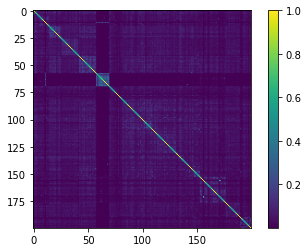

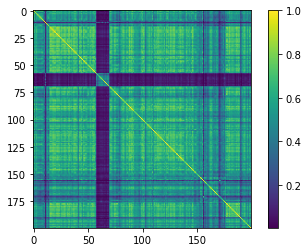

In [20]:
plt.imshow(infreq)
plt.colorbar()
plt.show()

plt.imshow(freq)
plt.colorbar()
plt.show()